# import 使用到的套件

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, GaussianNoise,Lambda
import matplotlib.pyplot as plt
import keras.backend as K

Using TensorFlow backend.


# 宣告一般 Function
## 1.get_mnist() : 取得mnist資料庫圖片

In [2]:
def get_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

# data pre-processing
    x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
    x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    
    return  x_train,x_test,y_train, y_test

# 宣告Model及用在Model上的function
## 1. get_model(source,target): 取得AE model
## 2. train_model(model,source,target,epochs=100, batch=1000):訓練AE model


In [3]:
def get_model(source,target):
    input_img = Input(shape=(784,))
    noisy_input = GaussianNoise(0.2)(input_img)
    encoded = Dense(784, activation='tanh')(noisy_input)
    encoded = Dense(512, activation='tanh')(encoded)
    encoded = Dense(512, activation='tanh')(encoded)
    decoded = Dense(512, activation='tanh')(encoded)
    decoded = Dense(512, activation='tanh')(decoded)
    decoded = Dense(784, activation='linear')(decoded)
    
    autoencoder = Model(inputs=input_img, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder

def train_model(model,source,target,epochs=100, batch=1000):
        hist = model.fit(source,target,epochs=epochs,batch_size=batch,shuffle=True)
        return model,hist
    


# Main Function

In [4]:
EPOCHS = 20
BATCH_SIZE = 256

x_train,x_test,y_train, y_test = get_mnist()
noise = np.random.normal(0,0.2,x_train.shape)
noisy_img = x_train + noise 

autoencoder = get_model(x_train,x_train)
autoencoder,hist = train_model(autoencoder,x_train,x_train,epochs=EPOCHS, batch=BATCH_SIZE)


Epoch 1/20
 2304/60000 [>.............................] - ETA: 765s - loss: 0.1586 

c:\users\eason\appdata\local\programs\python\python36\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149892). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 33s - loss: 0.0350    
Epoch 2/20
60000/60000 [==============================] - 1s - loss: 0.0151     
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 0.0125     
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 0.0113     
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 0.0105     
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.0100     
Epoch 7/20
60000/60000 [==============================] - 2s - loss: 0.0096     
Epoch 8/20
60000/60000 [==============================] - 1s - loss: 0.0092     
Epoch 9/20
60000/60000 [==============================] - 1s - loss: 0.0089     
Epoch 10/20
60000/60000 [==============================] - 2s - loss: 0.0086     
Epoch 11/20
60000/60000 [==============================] - 2s - loss: 0.0083     
Epoch 12/20
60000/60000 [==============================] - 1s - loss: 0.0081     
Epoch 13/20
60000/60000 [===========

# 繪出原圖

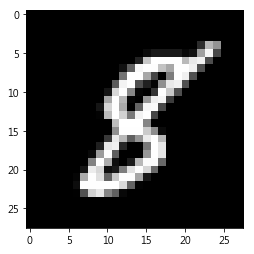

In [12]:
plt.imshow(x_train[202].reshape(28,28),cmap='gray')

# 繪出雜訊影響後的圖

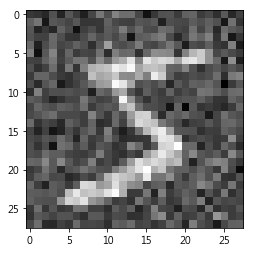

In [6]:
plt.imshow(noisy_img[0].reshape(28,28),cmap='gray')

# 繪出經 AE denoise 後的圖

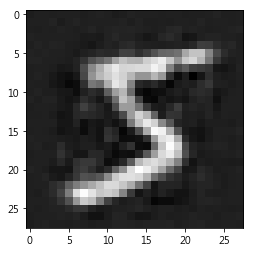

In [7]:
denoise_img = autoencoder.predict(noisy_img)
plt.imshow(denoise_img[0].reshape(28,28),cmap='gray')